In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# titanic dataset

train_data = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")  # training data
test_data = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")    # testing data
print(train_data.head())
print(train_data.keys())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')


In [3]:
y_train = train_data.pop('survived')
y_test = test_data.pop("survived")
# print(train_data.head())
# print(y_train,y_test)
print(test_data.describe())

              age  n_siblings_spouses       parch        fare
count  264.000000          264.000000  264.000000  264.000000
mean    28.720985            0.469697    0.386364   27.023880
std     14.157538            0.978393    0.837775   34.973108
min      0.420000            0.000000    0.000000    0.000000
25%     21.000000            0.000000    0.000000    7.925000
50%     28.000000            0.000000    0.000000   13.250000
75%     35.250000            1.000000    0.000000   27.900000
max     74.000000            8.000000    6.000000  263.000000


(array([ 24.,   7.,  11.,  21.,  54.,  65., 194.,  59.,  59.,  32.,  21.,
         28.,  23.,   4.,  11.,   6.,   3.,   4.,   0.,   1.]),
 array([ 0.75  ,  4.7125,  8.675 , 12.6375, 16.6   , 20.5625, 24.525 ,
        28.4875, 32.45  , 36.4125, 40.375 , 44.3375, 48.3   , 52.2625,
        56.225 , 60.1875, 64.15  , 68.1125, 72.075 , 76.0375, 80.    ]),
 <BarContainer object of 20 artists>)

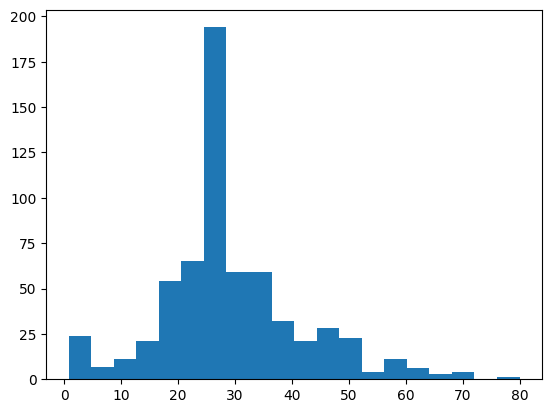

In [4]:
#ploting graphs
plt.hist(train_data['age'],bins=20)

<BarContainer object of 2 artists>

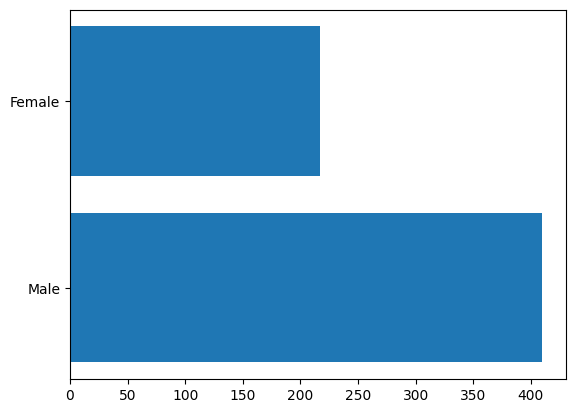

In [5]:
# checking the number of femmales and males using a graph
plt.barh(['Male','Female'],train_data['sex'].value_counts())

<BarContainer object of 3 artists>

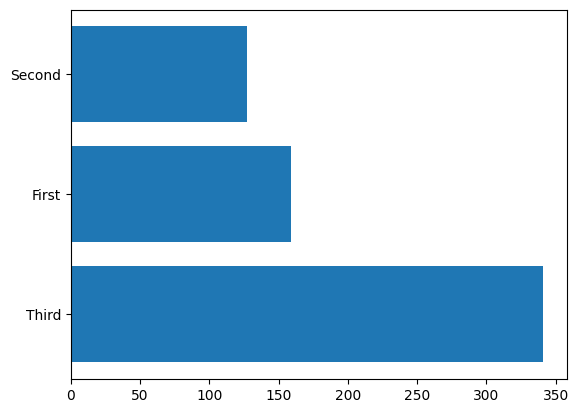

In [6]:
# plotting a graph based on their class(first,second,third)
plt.barh(train_data['class'].unique(),train_data['class'].value_counts())


In [7]:
# graph for plotting the survival percentage in based on the gender


In [8]:
print(train_data.shape)
test_data.shape

(627, 9)


(264, 9)

In [9]:
CATEGORICAL_COLS = ['sex','n_siblings_spouses','parch','class','deck',
                    'embark_town','alone']
NUMERIC_COLS = ['age','fare']

feature_cols=[]

for feature in CATEGORICAL_COLS :
  voc = train_data[feature].unique()
  feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(feature,voc))

for feature in NUMERIC_COLS:
  feature_cols.append(tf.feature_column.numeric_column(feature,dtype = tf.float64))
print(feature_cols)



Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [10]:
def make_input_fn(data_df ,label_df ,num_epochs = 10,shuffle = True,batch_size = 32):
  def input_func():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle :
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size = 32).repeat(num_epochs)
    return ds
  return input_func

train_input_fn = make_input_fn(train_data,y_train)
test_input_fn = make_input_fn(test_data,y_test,num_epochs = 1,shuffle = False)


In [11]:
# creating an linear reg estimator
linearReg_est = tf.estimator.LinearClassifier(feature_columns = feature_cols)

# training the estimator
linearReg_est.train(train_input_fn)

# evaluation
res = linearReg_est.evaluate(test_input_fn)

# accuracy
print(res)
print(res['accuracy'])


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.828191, 'auc_precision_recall': 0.7856962, 'average_loss': 0.51242083, 'label/mean': 0.375, 'loss': 0.5086459, 'precision': 0.6386555, 'prediction/mean': 0.46984166, 'recall': 0.7676768, 'global_step': 200}
0.75


In [12]:
print(train_data.shape,test_data.shape)

(627, 9) (264, 9)
